In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
site = ["A", "B", "C", "D", "E", "F", "G", "H"]
data_all = []

# load the data
data_directory = ""

for s in site: 
    data_name = s + "_data_clean.csv"
    d = pd.read_csv(os.path.join(os.getcwd(), data_directory, data_name), index_col = 0)
    data_all.append(d)

C:\Users\User\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


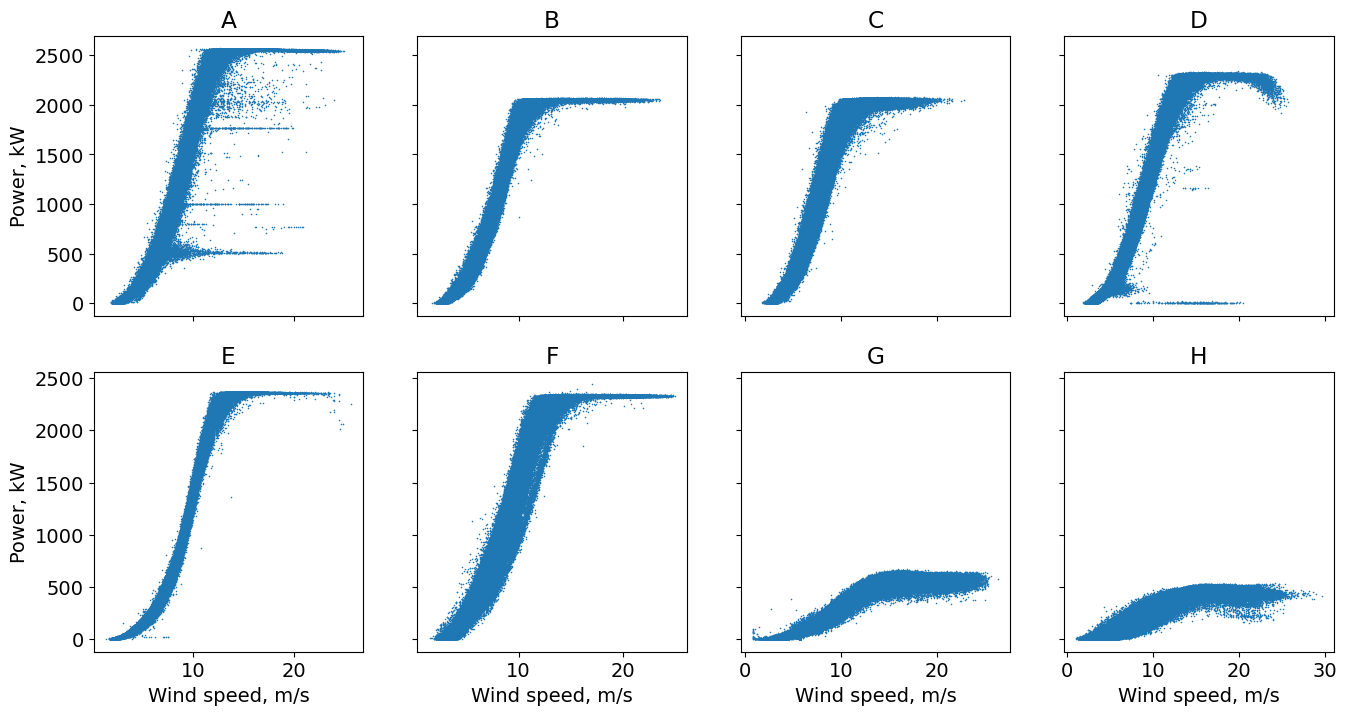

Wall time: 4.04 s


In [7]:
%%time
# Plot power curve for each turbine
plt.rc('font', size=14) 

fig, ax = plt.subplots(2,4, figsize=(16,8), sharex='col', sharey='row');

i = 0
for r in range (2):
        for c in range (4):
            data_turbine = data_all[i]
            sns.scatterplot(x = data_turbine['Wind_speed'], y = data_turbine['Power'], ax = ax[r][c], s = 1, edgecolor = None)
            ax[r][c].set_title(site[i])
            ax[r][c].set_xlabel("Wind speed, m/s") 
            ax[r][c].set_ylabel("Power, kW") 
            i += 1
plt.show()

In [3]:
# assign site name
i = 0

for s in site: 
    data_all[i] = data_all[i].assign(Site = s)
    i += 1

In [8]:
# combine data frames
data_all_combined = pd.DataFrame()
for i in range (len(site)):
    if data_all_combined.empty: 
        data_all_combined = data_all[i]
    else:
        data_all_combined = pd.concat([data_all_combined, data_all[i]])

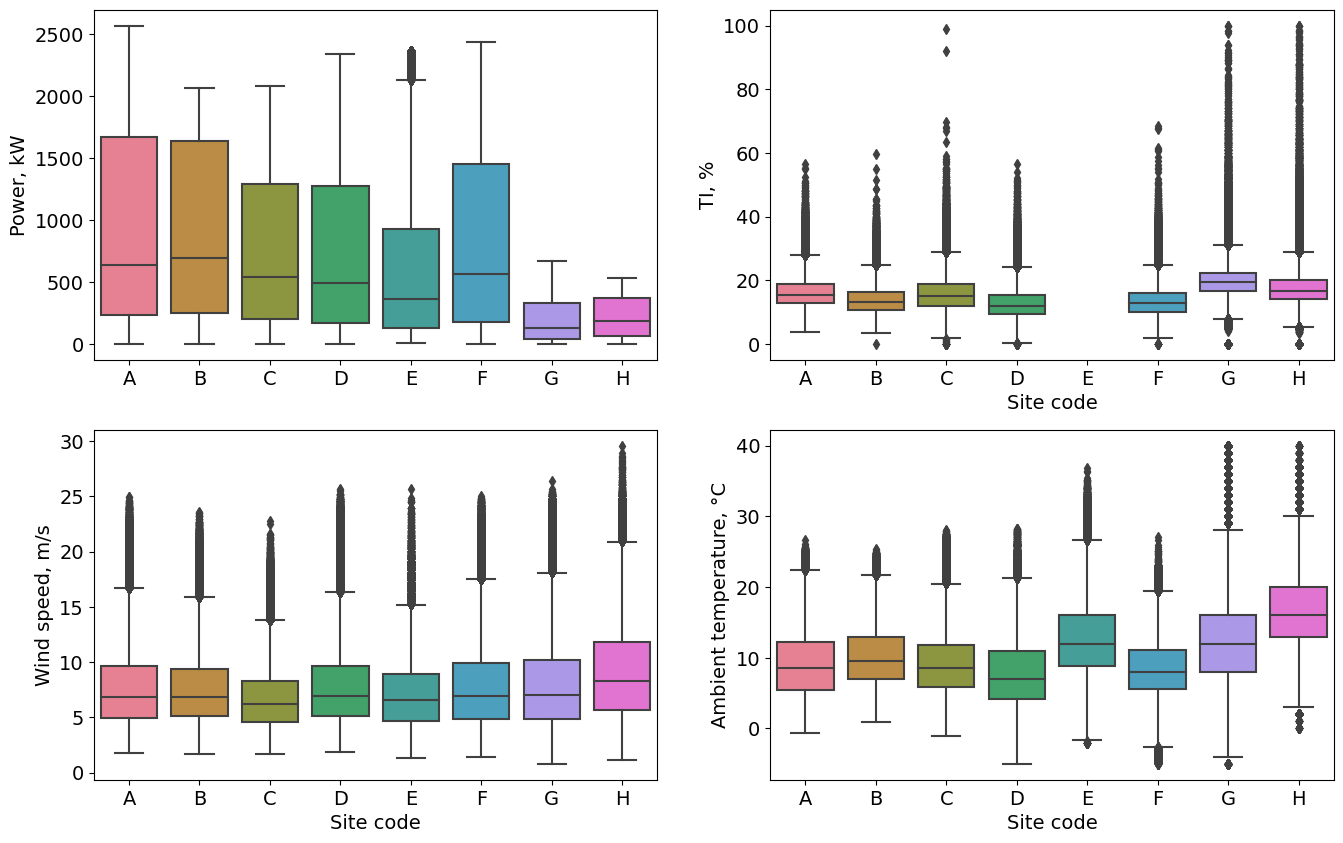

Wall time: 9.16 s


In [14]:
%%time 

# Make boxplot
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

features = [ 'Power','Wind_speed', 'TI','Temperature']
features_name = [ 'Power, kW','Wind speed, m/s', 'TI, %','Ambient temperature, °C']

i = 0
for r in range (2):
    for c in range (2):
        sns.boxplot( data = data_all_combined, y = features[i], x = 'Site', orient = 'v', ax = ax[c][r], palette = "husl")
        ax[c][r].set(ylabel = features_name[i], xlabel = 'Site code')
        i += 1
    #     ax[i].set_xticklabels(ID)
        if i == 1: 
            ax[c][r].set(xlabel=None)

plt.show()

In [12]:
temp = data_all_combined[(data_all_combined["Site"] != "G") & (data_all_combined["Site"] != "H") &
                        (data_all_combined["Site"] != "F")]

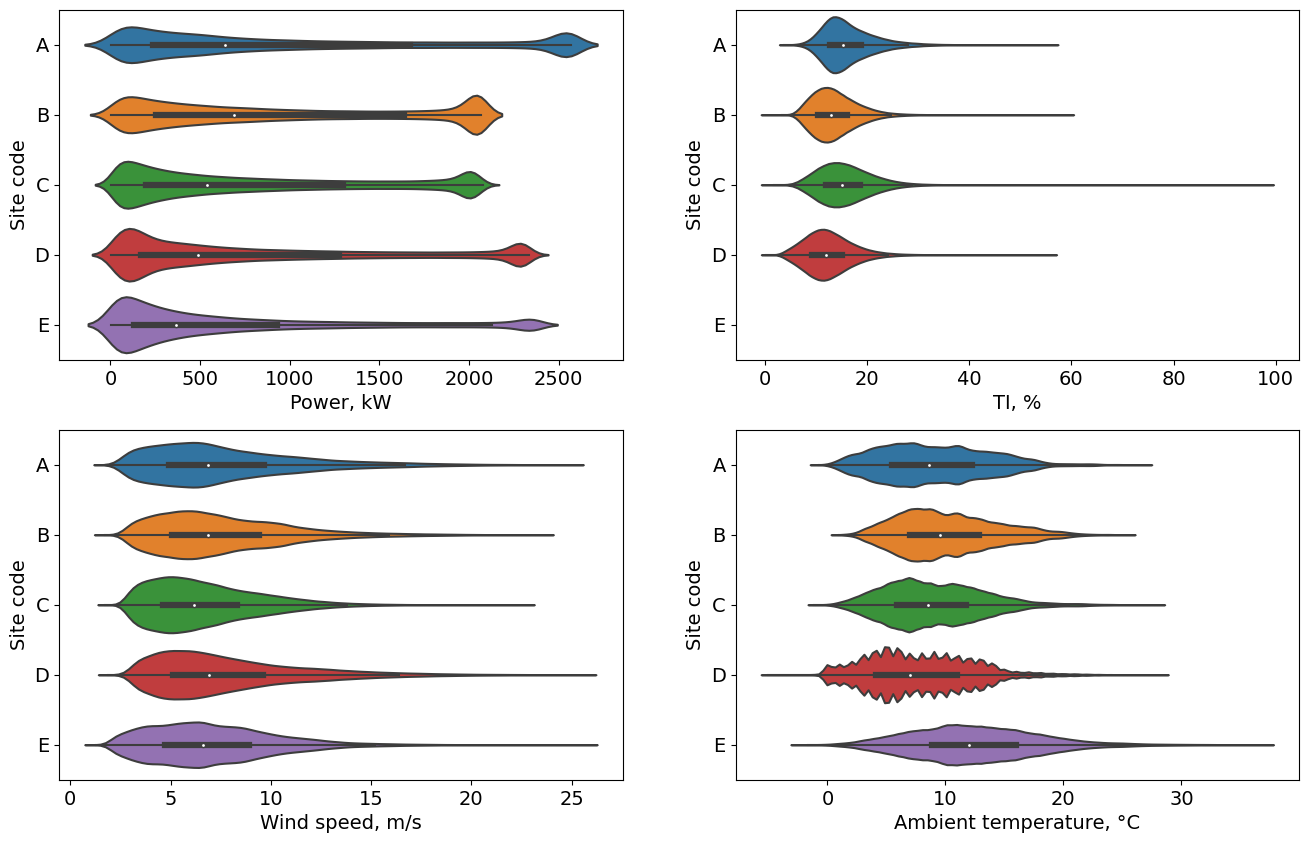

Wall time: 28.5 s


In [15]:
%%time 

plt.rc('font', size=14) 
# Make boxplot
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

features = [ 'Power','Wind_speed', 'TI','Temperature']
features_name = [ 'Power, kW','Wind speed, m/s', 'TI, %','Ambient temperature, °C']

i = 0
for r in range (2):
    for c in range (2):
        sns.violinplot( data = temp, x = features[i], y = 'Site', orient = 'h', ax = ax[c][r])
        ax[c][r].set(xlabel = features_name[i], ylabel = 'Site code')
        i += 1
    #     ax[i].set_xticklabels(ID)
#         if i == 1: 
#             ax[c][r].set(xlabel=None)

plt.show()